In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("gender.csv")

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.shape

(5001, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# Checking the Null Values

In [7]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  5001


,Total Missing,In Percent
long_hair,0,0.0
forehead_width_cm,0,0.0
forehead_height_cm,0,0.0
nose_wide,0,0.0
nose_long,0,0.0
lips_thin,0,0.0
distance_nose_to_lip_long,0,0.0
gender,0,0.0


# EDA Plot

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


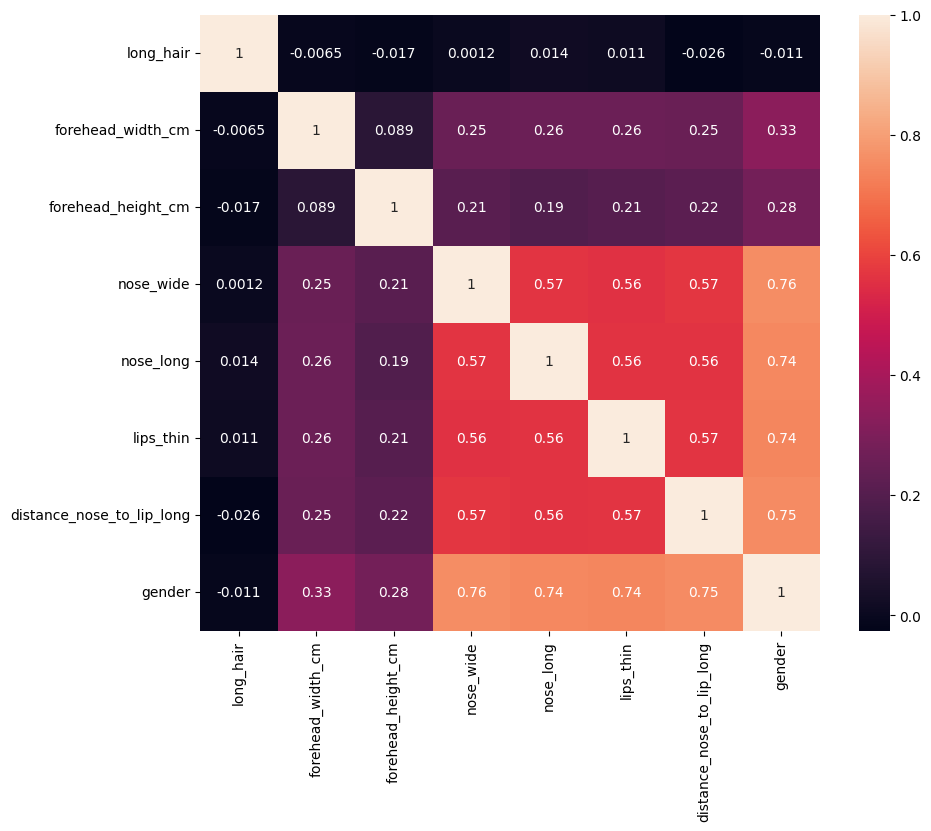

In [10]:
# Correlation Graph

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

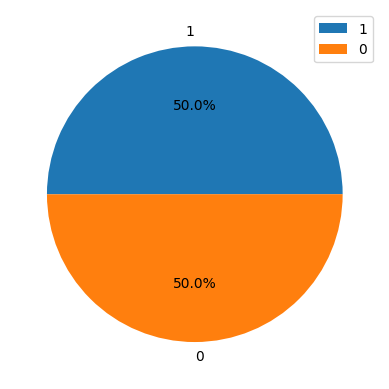

In [11]:
fig = plt.pie(
    df.gender.value_counts(),
    labels=df.gender.unique(),
    autopct='%1.1f%%'
)
plt.legend()
plt.show()

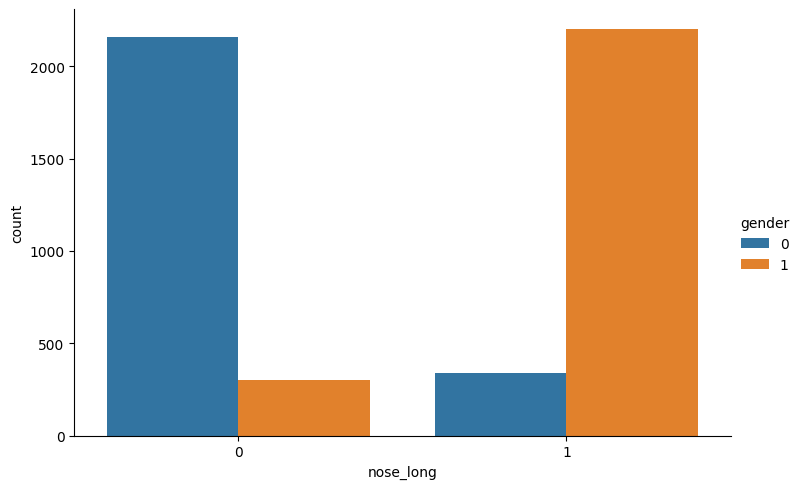

In [12]:
#  relation between nose length and the gender

sns.catplot(
    data=df,
    x='nose_long',
    kind='count',
    hue='gender',
    aspect=1.5
)
plt.show()

# Spliiting the dataset

In [13]:
y=df['gender']
X=df.drop(['gender'],axis=1)

In [14]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [15]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# Cross Validation

In [17]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model=RandomForestClassifier()
from sklearn import tree
kfold_validation=KFold(n_splits=10, random_state = 42, shuffle=True)

In [18]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.97205589 0.944      0.966      0.97       0.974      0.97
 0.978      0.972      0.966      0.978     ]
0.9690055888223552


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model1 = RandomForestClassifier(n_estimators=100, criterion='gini')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(accuracy1)


0.9700199866755497


# Logistics Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)

0.9693537641572285


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

0.9546968687541639


# Plot to show the relation between the accuracy of the model using differnt algorithms

In [22]:
X_axis_value=['Random Forest','Logistic Regression','Decison Tree']
Y_axis_value=[model1.score(X_test,y_test),model2.score(X_test, y_test),model3.score(X_test, y_test)]

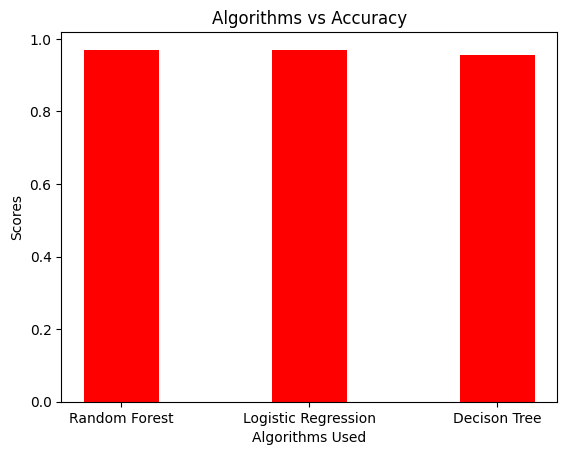

In [23]:
plt.bar(X_axis_value,Y_axis_value,color='red',width=0.4)
plt.xlabel('Algorithms Used')
plt.ylabel('Scores')
plt.title('Algorithms vs Accuracy')
plt.show()

# Experiment Tracking with MLFlow

In [24]:
import os
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

os.environ["MLFLOW_TRACKING_URI"] = "http://127.0.0.1:5000"

# Start an MLflow run
mlflow.start_run()

# Log parameters
mlflow.log_param("n_estimators", 100)
mlflow.log_param("criterion", "gini")

# Load data
y = df['gender']
X = df.drop(['gender'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# Train the model
model = RandomForestClassifier(n_estimators=100, criterion='gini')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and log metric
accuracy = metrics.accuracy_score(y_test, y_pred)
mlflow.log_metric("accuracy", accuracy)

# Log model artifact
mlflow.sklearn.log_model(model, "random-forest-model")

# End the MLflow run
mlflow.end_run()


e:\my_projects\gender_classification\env_gender\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
